In [1]:
import os

In [2]:
data_dir = 'C:/Users/pbhaska2/PycharmProjects/NLP/surface data/'

In [3]:
os.listdir(data_dir)

['Testing', 'Training']

In [4]:
# create two variables 

testing_path = data_dir + '/Testing/'
training_path = data_dir + '/Training/'

In [5]:
os.listdir(testing_path)

['Negative', 'Positive']

In [6]:
os.listdir(training_path)

['Negative', 'Positive']

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [8]:
positive_surface = imread(data_dir + '/Testing/' + '/Positive/' + '00001.jpg')

In [9]:
positive_surface.max()

195

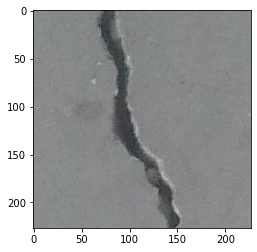

In [10]:
plt.imshow(positive_surface)

In [11]:
negative_surface = imread(data_dir + '/Testing/' + '/Negative/' + '00001.jpg')

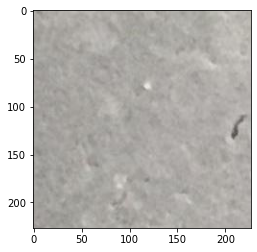

In [12]:
plt.imshow(negative_surface)

In [13]:
dim1 = []

dim2 = []

for img_name in os.listdir(data_dir + '/Testing/' + '/Negative'):
    
    img = imread(data_dir + '/Testing/' + '/Negative/' + img_name)
    
    
    d1, d2, color = img.shape
    
    dim1.append(d1)
    dim2.append(d2)

In [14]:
np.mean(dim1)

227.0

In [15]:
np.mean(dim2)

227.0

In [16]:
image_shape = (227, 227, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


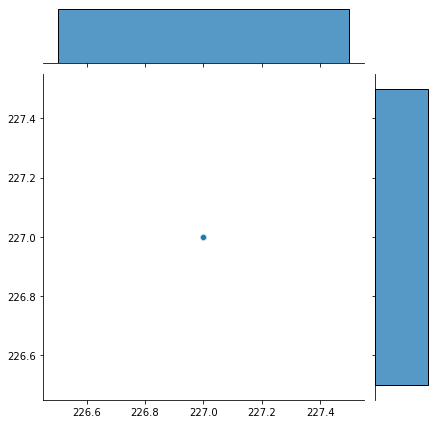

In [17]:
sns.jointplot(dim1, dim2)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_generator = ImageDataGenerator(rotation_range=20,
                                    shear_range=0.1,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    rescale=1/255,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    zoom_range=0.1)

In [20]:
image_generator.flow_from_directory(directory=training_path)

Found 40000 images belonging to 2 classes.


In [21]:
image_generator.flow_from_directory(directory=testing_path)

Found 40000 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
img_train_generator = image_generator.flow_from_directory(training_path,
                                                         target_size=image_shape[:2],
                                                         color_mode='rgb',
                                                         batch_size=64,
                                                         class_mode='binary')

Found 40000 images belonging to 2 classes.


In [27]:
img_test_generator = image_generator.flow_from_directory(testing_path,
                                                         target_size=image_shape[:2],
                                                         color_mode='rgb',
                                                         batch_size=64,
                                                         class_mode='binary',
                                                         shuffle=False)

Found 40000 images belonging to 2 classes.


In [28]:
img_train_generator.class_indices

{'Negative': 0, 'Positive': 1}

In [29]:
img_test_generator.class_indices

{'Negative': 0, 'Positive': 1}

In [30]:
result = model.fit_generator(img_train_generator, validation_data=img_test_generator, epochs=20, callbacks=[early_stop])

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
625/625 [==============================] - 5195s 8s/step - loss: 0.2188 - accuracy: 0.9373 - val_loss: 0.0773 - val_accuracy: 0.9735
Epoch 2/20
625/625 [==============================] - 3685s 6s/step - loss: 0.0669 - accuracy: 0.9801 - val_loss: 0.0499 - val_accuracy: 0.9830
Epoch 3/20
625/625 [==============================] - 3380s 5s/step - loss: 0.0553 - accuracy: 0.9818 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 4/20
625/625 [==============================] - 3639s 6s/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 5/20
625/625 [==============================] - 3630s 6s/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 6/20
625/625 [==============================] - 4551s 7s/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0280 - val_accuracy: 0.9918
Epoch 7/20
625/625 [==============================] - 4882s 8s/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0280 - val_accuracy:

In [31]:
hist = model.save('suface_crack_model.h5')